sku –--------------- Random ID for the product

national_inv –------ Current inventory level for the part

lead_time –--------- Transit time for product (if available)

in_transit_qty –---- Amount of product in transit from source

forecast_3_month –---Forecast sales for the next 3 months

forecast_6_month –-- Forecast sales for the next 6 months

forecast_9_month –-- Forecast sales for the next 9 months

sales_1_month -----– Sales quantity for the prior 1 month time period

sales_3_month -----– Sales quantity for the prior 3 month time period

sales_6_month -----– Sales quantity for the prior 6 month time period

sales_9_month -----– Sales quantity for the prior 9 month time period

min_bank ----------– Minimum recommend amount to stock

potential_issue ---– Source issue for part identified

pieces_past_due ---– Parts overdue from source

perf_6_month_avg --– Source performance for prior 6 month period

perf_12_month_avg -– Source performance for prior 12 month period

local_bo_qty ------– Amount of stock orders overdue

deck_risk ---------– Part risk flag

oe_constraint -----– Part risk flag

ppap_risk ---------– Part risk flag

stop_auto_buy -----– Part risk flag

rev_stop ----------– Part risk flag

went_on_backorder -– Product actually went on backorder. This is the target value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Kaggle_Training_Dataset_v2.csv')
test_df = pd.read_csv('Kaggle_Test_Dataset_v2.csv')

C:\Users\anshu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [192]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [193]:
df.shape

(1687861, 23)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [195]:
import os
import logging

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

f = logging.Formatter('%(asctime)s - %(levelname)s - %(name)s - %(message)s')
fh = logging.FileHandler('logfile1.log')
#fh.setLevel(logging.ERROR)

fh.setFormatter(f)
logger.addHandler(fh)

In [196]:
def remove_unwanted_spaces(data):
    logger.info('Start of saveTofile program')
    logger.info('Entered the remove_unwanted_spaces function')
    try:
        df_without_spaces=data.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 
        logger.info('Unwanted spaces removal Successful.Exited the remove_unwanted_spaces function')
        return df_without_spaces
    except Exception as e:
        logger.error('Exception occured in remove_unwanted_spaces function. Exception message:  ' + str(e))
        logger.error('unwanted space removal Unsuccessful. Exited the remove_unwanted_spaces function')
        raise Exception(e)

In [197]:
df = remove_unwanted_spaces(df)

In [198]:
def seperate_label_feature(data,label_column_name):
    logger.info('Entered the separate_label_feature function')
    try:
        X=data.drop(labels=label_column_name,axis=1) # drop the columns specified and separate the feature columns
        y=data[label_column_name]
        logger.info('Label Separation Successful. Exited the separate_label_feature function')
        return X,y
    except:
        logger.error('Exception occured in separate_label_feature function.'+ str(e))
        logger.error('Label Separation Unsuccessful. Exited the separate_label_feature function')
        raise Exception()
    

In [199]:
 def is_null_present(data):
        null_present = False
        cols_with_missing_values=[]
        cols = data.columns
        logger.info('Entered the is_null_present function')
        try:
            null_counts=data.isna().sum() # check for the count of null values per column
            for i in range(len(null_counts)):
                if null_counts[i]>0:
                    null_present=True
                    cols_with_missing_values.append(cols[i])
            logger.info('Finding missing values is a success.Exited the is_null_present function')
            return null_present,cols_with_missing_values
            
        except:
            logger.error('Exception occured in is_null_present function. Exception message:  ' + str(e))
            logger.error('Finding missing values failed. Exited the is_null_present function')
            raise Exception()

In [200]:
nullpresent, cols_with_missing_values = is_null_present(df)

In [201]:
def drop_last_row(data):
    data = data.drop(data.index[1687860])
    return data

In [202]:
df = drop_last_row(df)

In [203]:
def drop_null(data):   #drop rows with all null values
    data = data.dropna(how='all')
    return data

In [204]:
drop_null(df)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,NaN,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,NaN,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,NaN,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,NaN,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No


In [205]:
from sklearn.preprocessing import StandardScaler #for scaling the numeric columns
from sklearn.preprocessing import LabelEncoder #for encoding categorical columns

In [207]:
df.drop(columns='sku',inplace=True)

In [209]:
def scale_numerical_columns(data):
    numerical = [var_1 for var_1 in data.columns if data[var_1].dtype=='float64']
    num_df = data[numerical]
    logger.info("Entered the scale_numerical_columns function")

    try:
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(num_df)
        scaled_num_df = pd.DataFrame(data=scaled_data, columns=num_df.columns,index=data.index)
        data.drop(columns=scaled_num_df.columns,inplace=True)
        data = pd.concat([scaled_num_df, data], axis=1)
        logger.info("Scaling the numerical values is a success.Exited the scale_numerical_columns function")
        return data
    except Exception as e:
        logger.error('Exception occured in scale_numerical_columns function . Exception message:  ' + str(e))
        logger.error('scaling for numerical columns Failed. Exited the scale_numerical_columns function')
        raise Exception()

In [210]:
df = scale_numerical_columns(df)

In [211]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,-0.016752,NaN,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,-3.469149,-3.581662,-0.018577,No,No,No,No,Yes,No,No
1,-0.016684,0.159826,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,0.296052,0.287422,-0.018577,No,No,No,No,Yes,No,No
2,-0.016684,NaN,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,-3.469149,-3.581662,-0.018577,No,Yes,No,No,Yes,No,No
3,-0.016516,0.018103,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,0.262538,0.254145,-0.018577,No,No,No,No,Yes,No,No
4,-0.016482,NaN,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035129,...,-3.469149,-3.581662,-0.018577,No,Yes,No,No,Yes,No,No


In [212]:
def encode_categorical_columns(data):
    logger.info("Entered the encode_categorical_columns function")
    try:
            cat_df = data.select_dtypes(include=['object']).copy()
            cat_df['deck_risk'] = cat_df['deck_risk'].map({'Yes':1,'No':0})
            cat_df['oe_constraint'] = cat_df['oe_constraint'].map({'Yes':1,'No':0})
            cat_df['ppap_risk'] = cat_df['ppap_risk'].map({'Yes':1,'No':0})
            cat_df['stop_auto_buy'] = cat_df['stop_auto_buy'].map({'Yes':1,'No':0})
            cat_df['rev_stop'] = cat_df['rev_stop'].map({'Yes':1,'No':0})
            cat_df['potential_issue'] = cat_df['potential_issue'].map({'Yes':1,'No':0})
            cat_df['went_on_backorder'] = cat_df['went_on_backorder'].map({'Yes':1,'No':0})
            data.drop(columns=data.select_dtypes(include=['object']).columns, inplace=True)
            data= pd.concat([data,cat_df],axis=1)
            logger.info('encoding for categorical values successful. Exited the encode_categorical_columns functions')
            return data
    except Exception as e:
            logger.error('Exception occured in encode_categorical_columns function. Exception message:  ' + str(e))
            logger.error('encoding for categorical columns Failed. Exited the encode_categorical_columns function')
            raise Exception()

In [213]:
df = encode_categorical_columns(df)

In [214]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,-0.016752,NaN,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,-3.469149,-3.581662,-0.018577,0,0,0,0,1,0,0
1,-0.016684,0.159826,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,0.296052,0.287422,-0.018577,0,0,0,0,1,0,0
2,-0.016684,NaN,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,-3.469149,-3.581662,-0.018577,0,1,0,0,1,0,0
3,-0.016516,0.018103,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,0.262538,0.254145,-0.018577,0,0,0,0,1,0,0
4,-0.016482,NaN,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035129,...,-3.469149,-3.581662,-0.018577,0,1,0,0,1,0,0


In [215]:
def pie_freq_plot(data,column_name):
        f,ax=plt.subplots(1,2,figsize=(18,8))
        ax[0] = data[column_name].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
        ax[0].set_title('Pie plot of {}'.format(column_name))
        #f, ax = plt.subplots(figsize=(6, 8))
        ax[1] = sns.countplot(x=column_name, data=data, palette="Set1")
        ax[1].set_title("Frequency distribution of {} variable".format(column_name))

        plt.show()

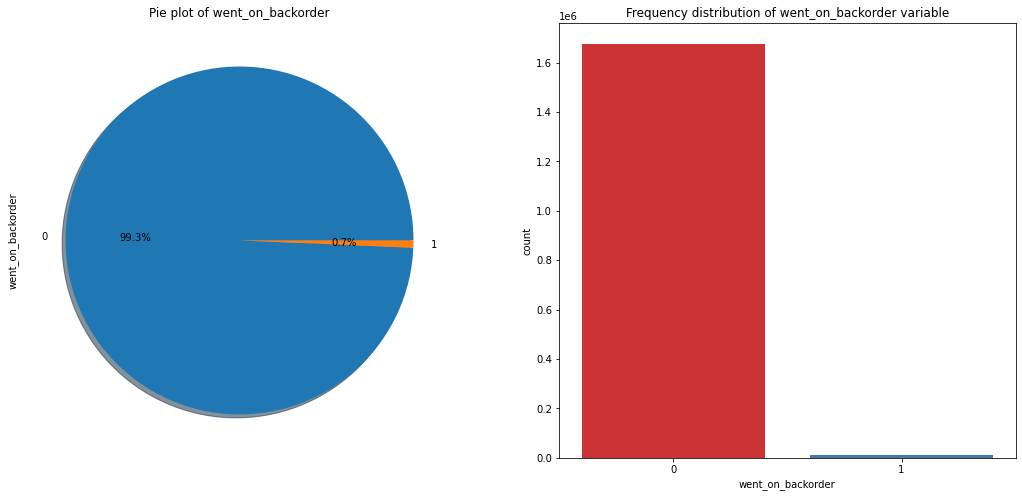

In [216]:
pie_freq_plot(df,'went_on_backorder')

In [217]:
def remove_nan_columns(data): #remove columns which have more than 60% of missing data
    logger.info("Entered the remove_nan_columns function")
    try:
        
        perc = 60.0
        min_count =  int(((100-perc)/100)*data.shape[0] + 1)
        mod_df = data.dropna( axis=1, 
                        thresh=min_count)
        logger.info("successfully removed columns with more than 60% of nan values")
        return mod_df
    except Exception as e:
        logger.error('Exception occured in remove_nan_columns function. Exception message:  ' + str(e))
        logger.error('Deleting columns with more than 60% nan values Failed. Exited the remove_nan_columns function')
        raise Exception()
    

In [218]:
df = remove_nan_columns(df)

In [219]:
from sklearn.impute import SimpleImputer

In [220]:
df.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [223]:
def impute_missing_values(data):
        columns =['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder','lead_time_was_missing']
        
        # make copy to avoid changing original data (when Imputing)
        new_data = data.copy()
        logger.info('Entered the impute_missing_values function')
        try:
            # make new columns indicating what will be imputed
            cols_with_missing = (col for col in new_data.columns 
                                             if new_data[col].isnull().any())
            for col in cols_with_missing:
                new_data[col + '_was_missing'] = new_data[col].isnull()

            # Imputation
            my_imputer = SimpleImputer(strategy='median')
            new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
            new_data.columns = columns
            return new_data
        except Exception as e:
            logger.error('Exception occured in impute_missing_values function. Exception message:  ' + str(e))
            logger.error('Imputing missing values failed. Exited the impute_missing_values function')
            raise Exception()

In [224]:
df=impute_missing_values(df)

In [225]:
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,lead_time_was_missing
0,-0.016752,0.018103,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,-3.581662,-0.018577,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.016684,0.159826,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,0.287422,-0.018577,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.016684,0.018103,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,-3.581662,-0.018577,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.016516,0.018103,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,0.254145,-0.018577,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.016482,0.018103,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035129,...,-3.581662,-0.018577,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,-0.016752,-0.832235,-0.032808,-0.033446,-0.034199,-0.034520,-0.029004,-0.032745,-0.034820,-0.034927,...,0.275814,0.129693,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1687856,-0.016786,0.018103,-0.032808,-0.034441,-0.034506,-0.034590,-0.028486,-0.033130,-0.035236,-0.034860,...,-3.581662,0.011077,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1687857,-0.016786,0.159826,-0.032808,-0.034043,-0.034301,-0.034451,-0.029004,-0.032168,-0.034404,-0.034590,...,0.281618,0.011077,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1687858,-0.014658,0.159826,-0.020892,-0.027677,-0.026338,-0.026453,-0.010853,-0.021575,-0.019632,-0.021584,...,0.281618,0.159347,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [226]:
def corr_plot(data):
    plt.figure(figsize=(20,15))
    return sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:ylabel='Frequency'>

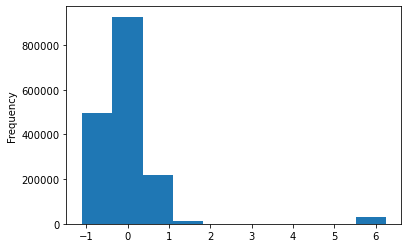

In [227]:
df.lead_time.plot.hist()

<AxesSubplot:>

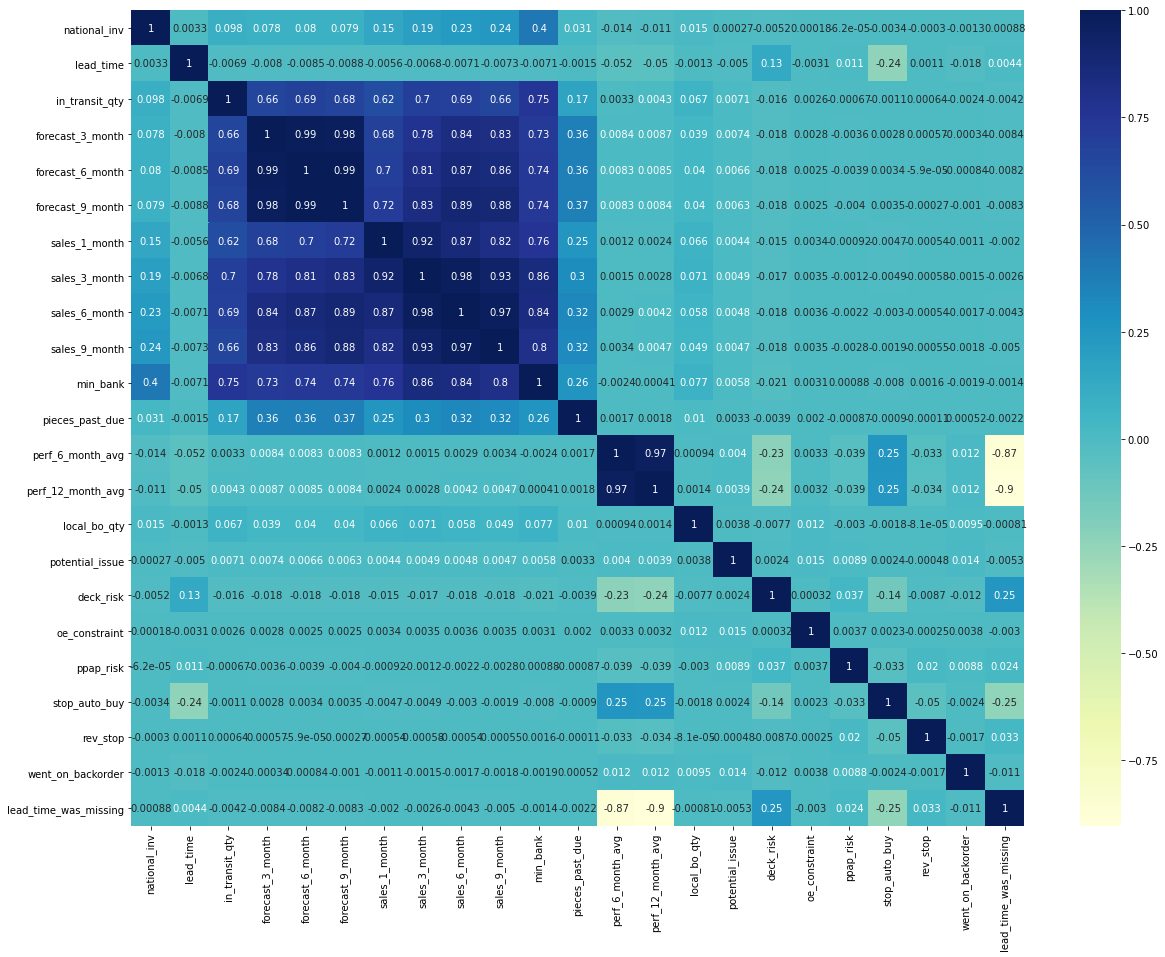

In [228]:
corr_plot(df)

In [229]:
df[df.columns[1:]].corr()['went_on_backorder'][:]

lead_time               -0.018104
in_transit_qty          -0.002427
forecast_3_month        -0.000340
forecast_6_month        -0.000840
forecast_9_month        -0.001030
sales_1_month           -0.001131
sales_3_month           -0.001512
sales_6_month           -0.001728
sales_9_month           -0.001764
min_bank                -0.001867
pieces_past_due          0.000516
perf_6_month_avg         0.011676
perf_12_month_avg        0.011593
local_bo_qty             0.009504
potential_issue          0.014090
deck_risk               -0.011691
oe_constraint            0.003837
ppap_risk                0.008814
stop_auto_buy           -0.002424
rev_stop                -0.001708
went_on_backorder        1.000000
lead_time_was_missing   -0.010761
Name: went_on_backorder, dtype: float64

In [230]:
# #Correlation with output variable
cor_target = abs(df[df.columns[1:]].corr()['went_on_backorder'][:])

# #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.005]
relevant_features

lead_time                0.018104
perf_6_month_avg         0.011676
perf_12_month_avg        0.011593
local_bo_qty             0.009504
potential_issue          0.014090
deck_risk                0.011691
ppap_risk                0.008814
went_on_backorder        1.000000
lead_time_was_missing    0.010761
Name: went_on_backorder, dtype: float64

## Feature Importance

In [300]:
X,y = seperate_label_feature(df,'went_on_backorder')

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [234]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [236]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

perf_12_month_avg        0.101271
national_inv             0.101224
perf_6_month_avg         0.098278
sales_9_month            0.086225
forecast_9_month         0.084113
forecast_6_month         0.077616
sales_6_month            0.076984
forecast_3_month         0.075425
sales_3_month            0.066656
min_bank                 0.053478
sales_1_month            0.053404
lead_time                0.041141
in_transit_qty           0.024907
ppap_risk                0.013851
local_bo_qty             0.013769
pieces_past_due          0.012594
deck_risk                0.011811
stop_auto_buy            0.004082
lead_time_was_missing    0.001546
potential_issue          0.001082
oe_constraint            0.000484
rev_stop                 0.000058
dtype: float64

In [237]:
dataframe = pd.DataFrame({
    'feature_name': ['perf_12_month_avg', 'national_inv', 'perf_6_month_avg',
       'sales_9_month', 'forecast_9_month', 'forecast_6_month',
       'sales_6_month', 'forecast_3_month', 'sales_3_month', 'min_bank',
       'sales_1_month', 'lead_time', 'in_transit_qty', 'ppap_risk',
       'local_bo_qty', 'pieces_past_due', 'deck_risk', 'stop_auto_buy',
       'lead_time_was_missing', 'potential_issue', 'oe_constraint',
       'rev_stop'],
    'feature_scores': [0.101271,0.101224,0.098278,0.086225,0.084113,0.077616,0.076984,
                      0.075425,0.066656,0.053478,0.053404,0.041141,0.024907,0.013851,
                      0.013769,0.012594,0.011811,0.004082,0.001546,0.001082,0.000484,0.000058]})

In [238]:
dataframe

,feature_name,feature_scores
0,perf_12_month_avg,0.101271
1,national_inv,0.101224
2,perf_6_month_avg,0.098278
3,sales_9_month,0.086225
4,forecast_9_month,0.084113
5,forecast_6_month,0.077616
6,sales_6_month,0.076984
7,forecast_3_month,0.075425
8,sales_3_month,0.066656
9,min_bank,0.053478


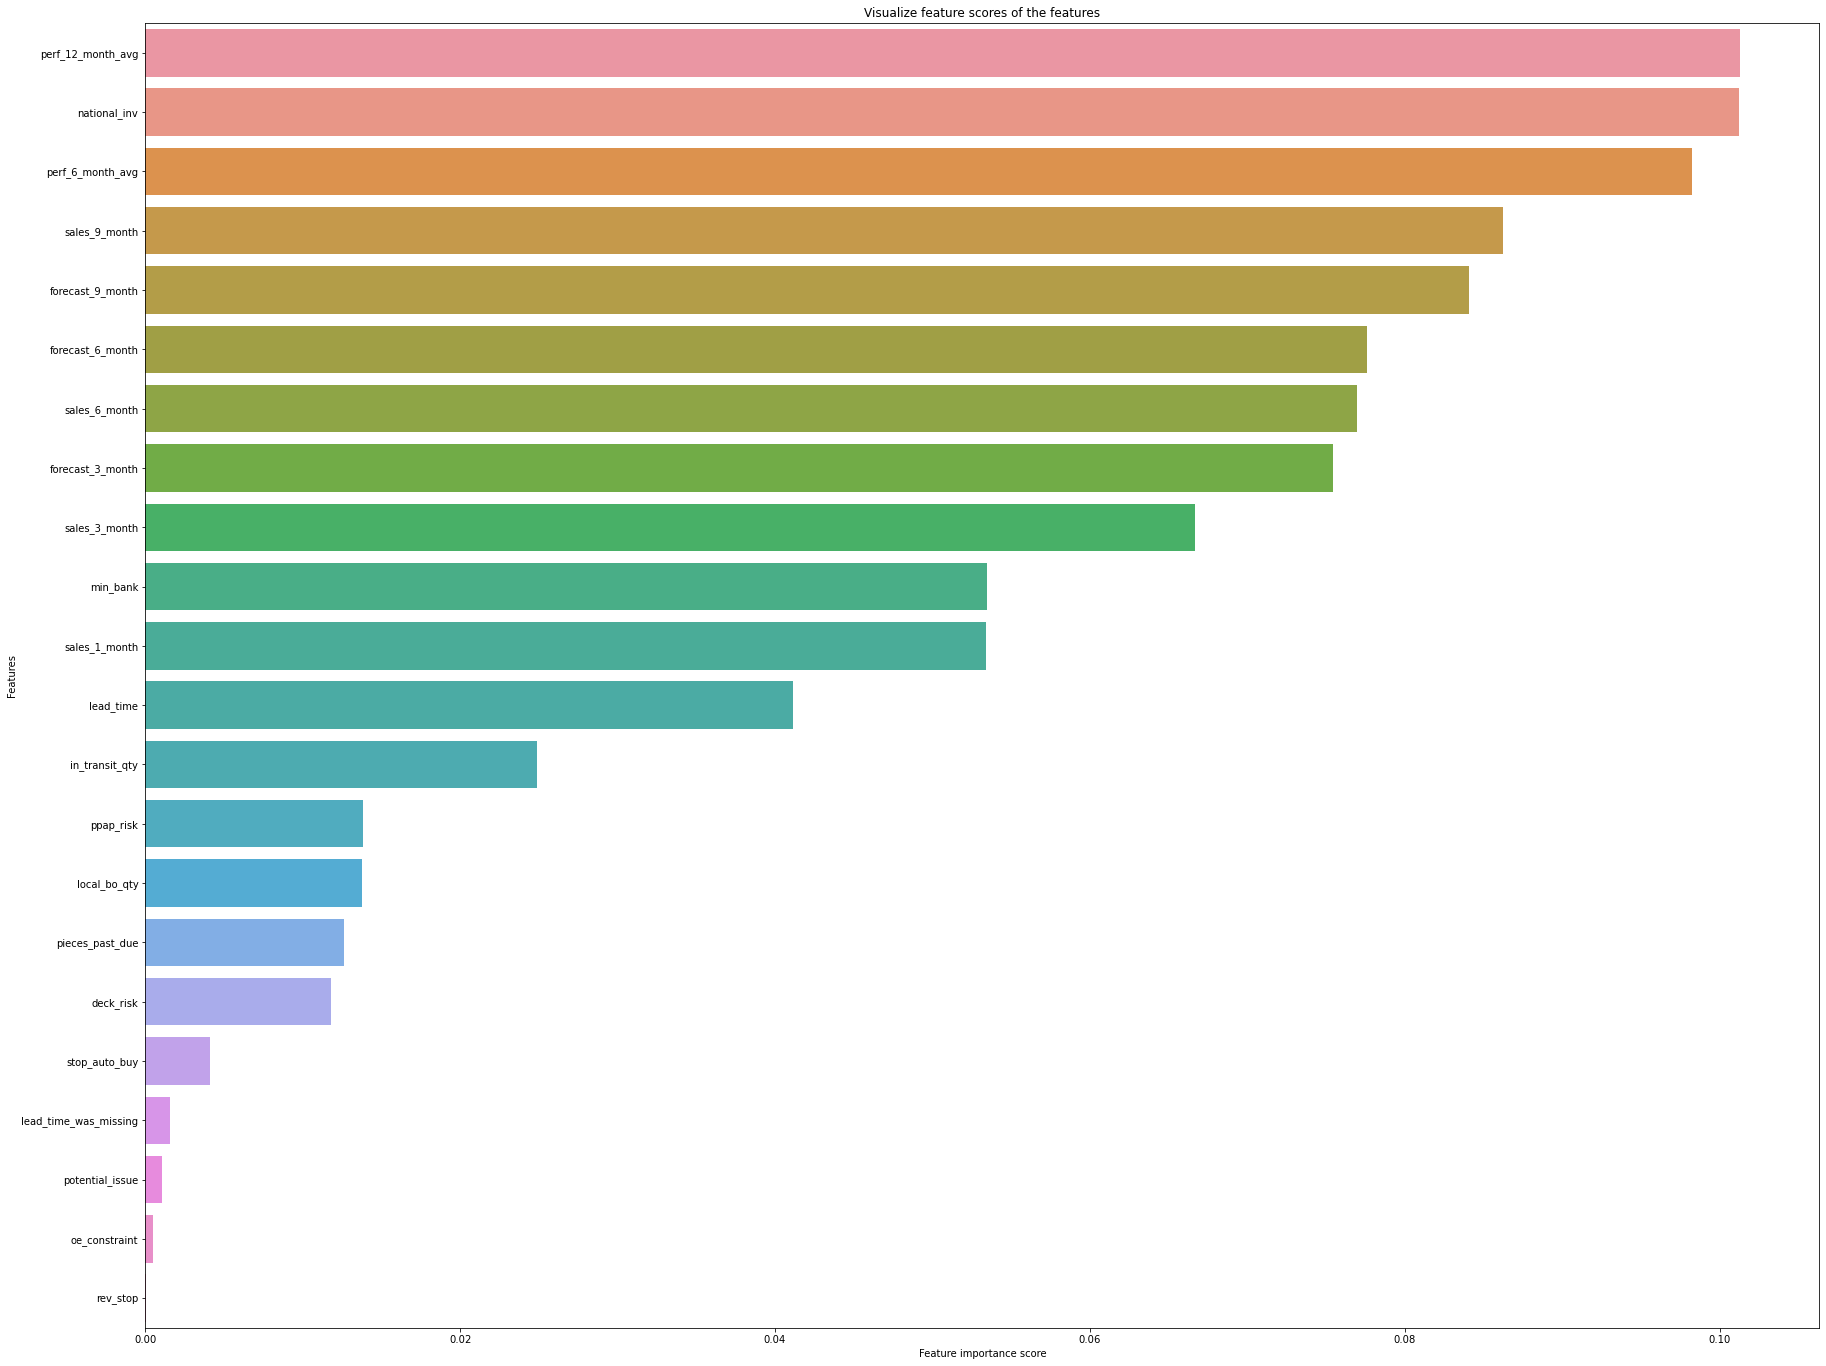

In [239]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x='feature_scores', y='feature_name', data=dataframe)
ax.set_title("Visualize feature scores of the features")
#ax.set_yticklabels(feature_name)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [297]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1687860, 21) (1687860,) (242075, 21) (242075,)


# Modelling

In [298]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

In [299]:
# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Model Performance matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, classification_report

## Gradient Boosting

In [242]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracy_GB = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)
y_pred_GB = gradient_booster.predict(X_test)

print("Train Score:",np.mean(accuracy_GB))
print("Test Score:",gradient_booster.score(X_test,y_test))

Train Score: 0.9932759496531378
Test Score: 0.9931471434162666


In [272]:
result_dict_train["Gradient-Boost Default Train Score"] = np.mean(accuracy_GB)
result_dict_test["Gradient-Boost Default Test Score"] = gradient_booster.score(X_test,y_test)

## Random Forest

In [244]:
random_forest = RandomForestClassifier(n_estimators=10)
accuracy_RF = cross_val_score(random_forest, X_train, y_train, cv=5)
random_forest.fit(X_train, y_train)
Y_pred_RF = random_forest.predict(X_test)

print("Train Score:",np.mean(accuracy_RF))
print("Test Score:",random_forest.score(X_test,y_test))

Train Score: 0.9942760680963572
Test Score: 0.994425433667149


In [273]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracy_RF)
result_dict_test["Random Forest Default Test Score"] = random_forest.score(X_test,y_test)

## XGBoost Model

In [249]:
model = XGBClassifier()
accuracy_XGB = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred_XGB = model.predict(X_test)

print("Train Score:",np.mean(accuracy_XGB))
print("Test Score:",model.score(X_test,y_test))

C:\Users\anshu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anshu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anshu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anshu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anshu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anshu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Score: 0.9935712984601169
Test Score: 0.9935313486321217


In [274]:
result_dict_train["XGBoost Default Train Score"] = np.mean(accuracy_XGB)
result_dict_test["XGBoost Default Test Score"] =  model.score(X_test,y_test)

## Model Performance

In [260]:
modelling_score = pd.DataFrame({
    'Model': ['Gradient Boosting','Random Forest','XGBoost'],
    'Score': [np.mean(accuracy_GB), np.mean(accuracy_RF), np.mean(accuracy_XGB)]})

In [261]:
modelling_score.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.994276
2,XGBoost,0.993571
0,Gradient Boosting,0.993276


In [265]:
cm_GB = confusion_matrix(y_test, y_pred_GB)
cm_RF = confusion_matrix(y_test, Y_pred_RF)
cm_XGB = confusion_matrix(y_test, y_pred_XGB)

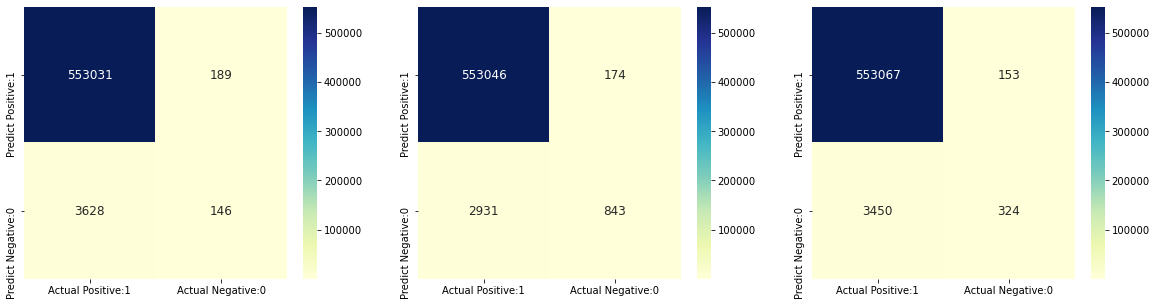

In [269]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20,5), ncols=3, nrows=1)

cm_matrix_GB = pd.DataFrame(data=cm_GB, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_GB,ax=ax1, annot=True, fmt='d', cmap='YlGnBu',annot_kws={"size": 12})

cm_matrix_RF = pd.DataFrame(data=cm_RF,columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_SVM,ax=ax2, annot=True, fmt='d', cmap='YlGnBu',annot_kws={"size": 12})

cm_matrix_XGB = pd.DataFrame(data=cm_XGB, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_NB,ax=ax3, annot=True, fmt='d', cmap='YlGnBu',annot_kws={"size": 12})

plt.show()

In [303]:
import pickle

In [308]:
pickle.dump(gradient_booster,open('GB_pickle','wb'))

In [311]:
pickle.dump(random_forest,open('RF_pickle','wb'))

In [312]:
pickle.dump(model,open('XGB_pickle','wb'))